<h1><center>IE 313 Time Series Analysis: Code Implementation Assignment 1</center></h1>

<div align="right">2022 Fall, Prof. Yongjae Lee</div>
<div align="right"> Coded by TA. JunPyo Park</div>

# read data

Install the required packages using pip
* Install using pip : `pandas`, `sklearn`, `matplotlib`, `statsmodels`
* This code was developed in Python 3.8 and any other versions are allowed.

In [1]:
import numpy as np  #for numeric computations like log, exp, sqrt
import pandas as pd #for reading & storing data, pre=processing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt #for visualization
import statsmodels.api as sm
from scipy import stats

## Read Data

![](https://trello.com/1/cards/62469d0f1dfc968cf7510f2b/attachments/63183fba10424b00f60b8b47/previews/63183fbb10424b00f60b8b6b/download/image.png)

Download your data file in Excel (.csv) as shown in the figure above.

* You can use time-series data, which have 'Date' or 'Timestamp' columns.
* Also, you can use sequential data which do not have 'Date' columns.

Read '.csv' file in the form of DataFrame (pandas.DataFrame) through 'read_csv' method in Pandas. 

* Else, read using 'read_excel' method. 
* If there is 'Date' column, indexing is possible by specifying 'index_col' as below.

In [2]:
# use your own data
data = pd.read_csv('stockPrice.csv', index_col='date')


It is convenient to change Date dtype from 'object' to 'datetime'.

In [3]:
# check index type
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
       '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23'],
      dtype='object', name='date', length=10534)


Convert index type using 'pd.to_datetime' method.

In [4]:
# convert index type to datetime
data.index = pd.to_datetime(data.index)

In [5]:
# Check that dtype has changed to datetime
data.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23'],
              dtype='datetime64[ns]', name='date', length=10534, freq=None)

Filter data with are not about opening price

In [6]:
data.drop(['high', 'low', 'close', 'volume'], axis = 1, inplace=True)

## Your Data Overview


Visualize your data using 'plot()' function.

<AxesSubplot: xlabel='date'>

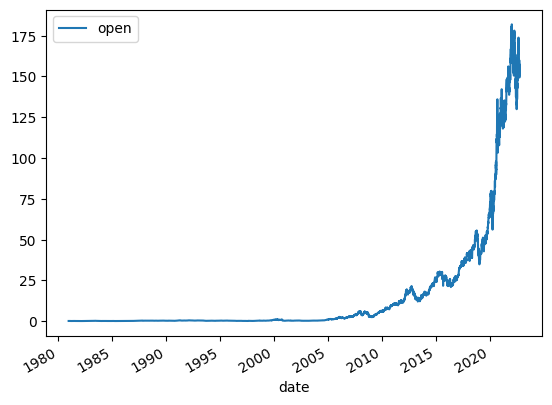

In [7]:
data.plot()

### Plot Scatter


Shift your data by one time step interval through 'shift(1)' and draw a scatter plot.

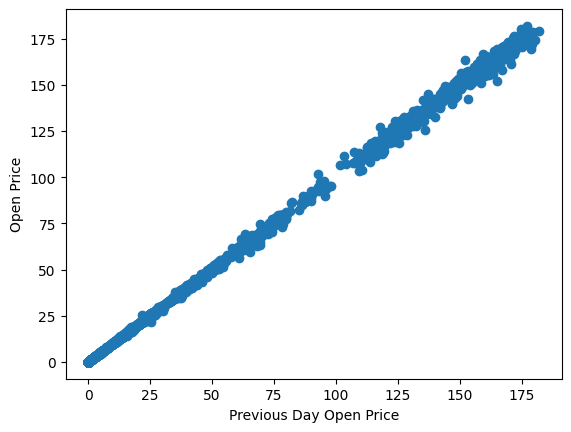

In [52]:
plt.scatter(data.shift(1)[1:], data[1:])
plt.xlabel('Previous Day Open Price')
plt.ylabel('Open Price');

### Resample Data

Follow this part if you need to resample your data.

Set a different period using the `resample` (In this example,the period is changed from daily to monthly).

In [9]:
# monthly_data = data.resample('M').first() # resample with closing price on the first trading day of the month 
# monthly_data = data.resample('M').mean() # resample with monthly average closing price
monthly_data = data.resample('M').last() # resample with closing price on the last trading day of the month 

In [10]:
monthly_data.head()

,open
date,
1980-12-31,0.1195
1981-01-31,0.0994
1981-02-28,0.0924
1981-03-31,0.0863
1981-04-30,0.0990


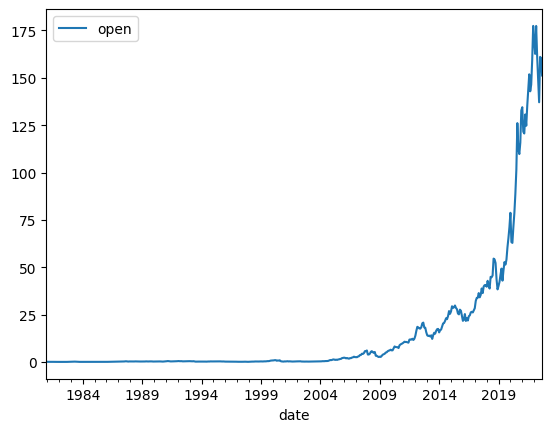

In [11]:
# visualize resampled data
monthly_data.plot();

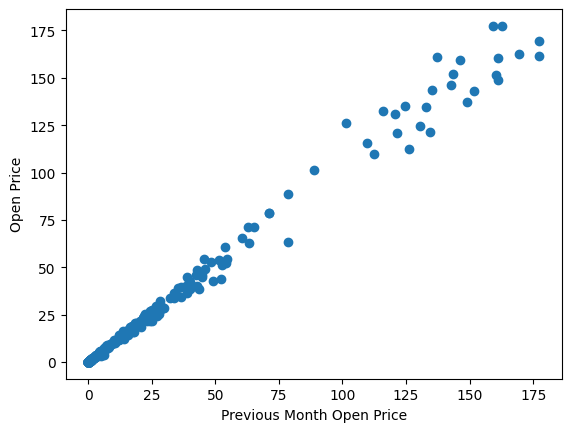

In [12]:
# Relationship with the previous month
plt.scatter(monthly_data.shift(1)[1:], monthly_data[1:])
plt.xlabel('Previous Month Open Price')
plt.ylabel('Open Price');

## Define Variables

Set x so that can represent time as the length of data.


In [13]:
x = np.arange(len(data))
x

array([    0,     1,     2, ..., 10531, 10532, 10533])

Set y as the target of your analysis.

In [14]:
# y = data.values.reshape(-1,1)
y = data.values
y

array([[1.0030e-01],
       [9.5500e-02],
       [8.8500e-02],
       ...,
       [1.5734e+02],
       [1.5238e+02],
       [1.5119e+02]])

## Linear Regression

How to run the Linear Regression

$$y=w_0+w_1 x =\begin{bmatrix}
w_0 & w_1
\end{bmatrix}   \begin{bmatrix}
1\\
x
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Find the parameter $\mathbf{w}$ based on linear regression model above.


Calculate vector $\mathbf{x}$.
Use `add_constant` method in statsmodels.

In [15]:
X = sm.add_constant(x)
X

array([[1.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00],
       ...,
       [1.0000e+00, 1.0531e+04],
       [1.0000e+00, 1.0532e+04],
       [1.0000e+00, 1.0533e+04]])



Now, $y$ and $\mathbf{x}$ are ready. Find $\mathbf{w}$ to minimize the residual.



Use 'OLS.fit()' in statsmodels to fit linear model.
Use `summary()` method to analyze the result of model(p-value, R-squared, etc).



*   Fitting means to optimize $\mathbf{w}$.
*   Ordinary Least Square (OLS) can be utilized to minimize Mean Squared Error (MSE).



### Fitting Linear Regression

In [16]:
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     7080.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        17:54:40   Log-Likelihood:                -49205.
No. Observations:               10534   AIC:                         9.841e+04
Df Residuals:                   10532   BIC:                         9.843e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.6986      0.504    -43.081      0.0



Calculate the parameter $\mathbf{w}$ using `params` method.

In [17]:
lin_reg.params # w_0, w_1

array([-2.16985532e+01,  6.96875866e-03])

In [18]:
intercept=lin_reg.params[0]
coef = lin_reg.params[1]

In [19]:
intercept

-21.698553153855585

In [20]:
coef

0.006968758659242058

Finally, $$y=12.600+0.062 x$$ is obtained.

### Plot Linear Regression Results


Use the `predict` method to calculate the model prediction for input x

* Plot with your data

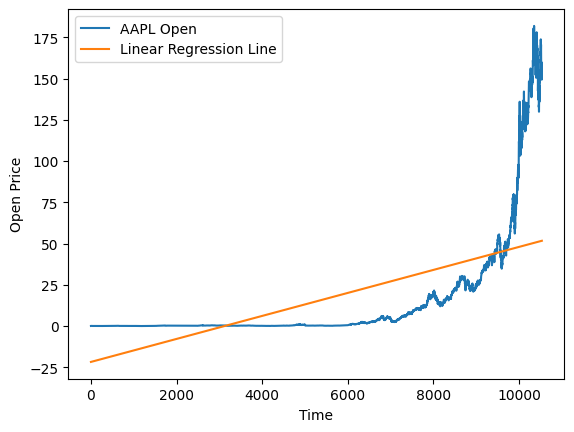

In [21]:
plt.plot(x,y,label='AAPL Open') # original data

y_hat = lin_reg.predict(X)
plt.plot(x,y_hat,label='Linear Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend();

### Linear Regression MSE


Calculate Mean Squared Error (MSE) of model using `mse_resid` method.

In [22]:
# MSE
lin_reg.mse_resid

668.1587602478692